# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [104]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [105]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, precision_recall_curve
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [107]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [108]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [109]:
# your code here (optional)
train_df.dtypes

AccountAge                    int64
MonthlyCharges              float64
TotalCharges                float64
SubscriptionType             object
PaymentMethod                object
PaperlessBilling             object
ContentType                  object
MultiDeviceAccess            object
DeviceRegistered             object
ViewingHoursPerWeek         float64
AverageViewingDuration      float64
ContentDownloadsPerMonth      int64
GenrePreference              object
UserRating                  float64
SupportTicketsPerMonth        int64
Gender                       object
WatchlistSize                 int64
ParentalControl              object
SubtitlesEnabled             object
CustomerID                   object
Churn                         int64
dtype: object

In [112]:
train_df.isna().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

In [113]:
test_df.isna().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
dtype: int64

In [110]:
proportion = train_df['Churn'].value_counts(normalize=True)
print(proportion)

Churn
0    0.818768
1    0.181232
Name: proportion, dtype: float64


In [114]:
train_df['Churn'].value_counts()

Churn
0    199605
1     44182
Name: count, dtype: int64

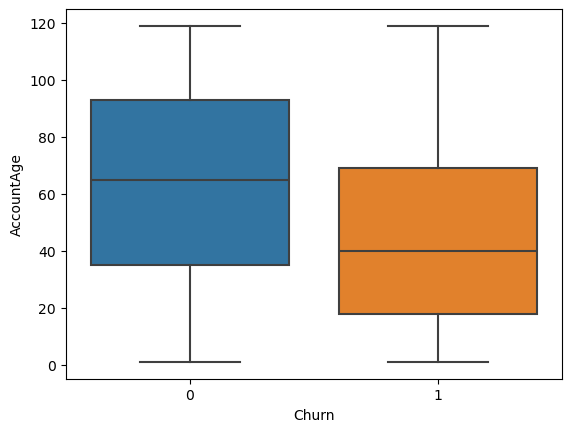

In [111]:
sns.boxplot(x=train_df['Churn'], y=train_df['AccountAge'], data=train_df)
plt.show()

# AccountAge Feature Analysis (BoxPlot Interpretation)

**Clear Trend:** Customers with older accounts are less likely to churn. Retention strengthens over time.

**Key Observations:**

**Non-Churning Customers (Churn = 0):**
- Higher average account age
- Median AccountAmonths~65 days
- Interquartile Range (IQR)months5-95 days
- Few newer accounts monthse <10 days)

**Churning Customers (Churn = 1):**
- Lower average account age
- Median AcmonthstAge: ~40 days
- Interquartile RangemonthsR): ~15-75 days

**Implication:** 
Account longevity strongly correlates with retention. Customers with accoumonthsnewer than 40 days represent the highest-risk of churn.

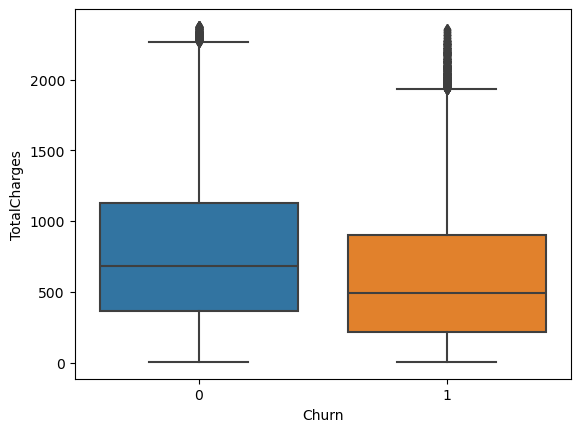

In [115]:
sns.boxplot(x=train_df['Churn'], y=train_df['TotalCharges'], data=train_df)
plt.show()

## TotalCharges Feature Analysis (BoxPlot)

**Clear Trend:** Higher TotalCharges → Lower churn risk  

**Non-Churning (Churn = 0):**  
- Median: Just above 700  
- IQR: Approximately 350 to 1,200  
- Outliers: Frequent, especially beyond 2,000  

**Churning (Churn = 1):**  
- Median: Below 600 
- IQR: Roughly 200 to 900  
- Outliers: Less frequent and lower in value  

**Implication:** Customers with TotalCharges under 600 represent a high churn-risk segment. These users may be newer or less engaged and should be prioritized for retention strategies.

In [116]:
train_df.groupby('Churn')['MonthlyCharges'].mean()

Churn
0    12.286129
1    13.414880
Name: MonthlyCharges, dtype: float64

C:\Users\renan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\renan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\renan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\renan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

<Axes: xlabel='ViewingHoursPerWeek', ylabel='Count'>

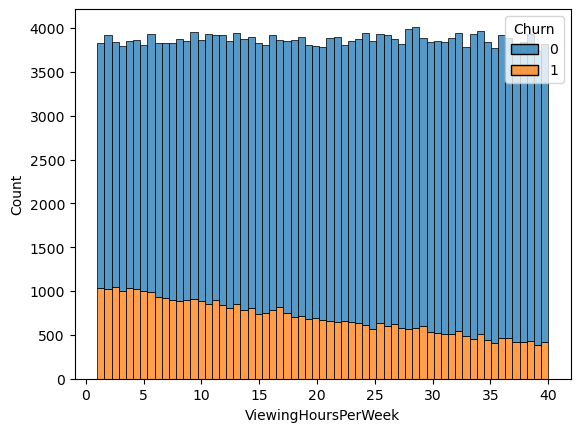

In [117]:
sns.histplot(data=train_df, x='ViewingHoursPerWeek', hue='Churn', multiple='stack')

## ViewingHoursPerWeek Analysis (Histogram Interpretation)

**Observed Pattern:**
* Absolute customer count remains relatively stable across usage levels (similar bar heights)
* Churn proportion (orange) clearly decreases as viewing hours increase

**Key Interpretation:**
* Customers who watch less content weekly are more likely to churn
* Higher viewing engagement correlates with lower churn rates

<Axes: xlabel='Churn'>

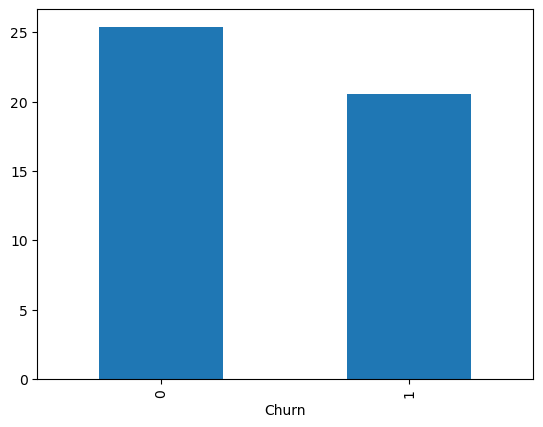

In [118]:
train_df.groupby('Churn')['ContentDownloadsPerMonth'].mean().plot(kind='bar')

## ContentDownloadsPerMonth Analysis

**Key Findings:**
* Customers downloading more content monthly show lower churn probability
* Content download behavior is positively associated with retention

**Business Interpretation:**
* Higher content engagement → stronger customer retention
* Monthly downloads serve as a strong retention indicator

<Axes: xlabel='SupportTicketsPerMonth', ylabel='count'>

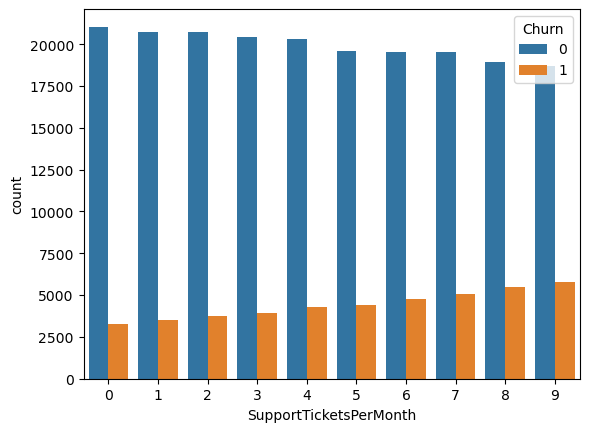

In [119]:
sns.countplot(x='SupportTicketsPerMonth', hue='Churn', data=train_df)

In [120]:
churn_subscription = train_df.groupby('SubscriptionType')['Churn'].mean().sort_values(ascending=False)
print(churn_subscription)

SubscriptionType
Basic       0.196521
Standard    0.184314
Premium     0.162775
Name: Churn, dtype: float64


In [121]:
print(pd.crosstab(train_df['PaymentMethod'], train_df['Churn'], normalize='index'))

Churn                    0         1
PaymentMethod                       
Bank transfer     0.820731  0.179269
Credit card       0.837749  0.162251
Electronic check  0.807529  0.192471
Mailed check      0.809112  0.190888


In [122]:
frequencia = train_df['GenrePreference'].value_counts(normalize=True)
train_df['GenrePreference_Grouped'] = train_df['GenrePreference'].apply(
    lambda x: x if frequencia[x] >= 0.05 else 'Other'
)

print(train_df.groupby('GenrePreference_Grouped')['Churn'].mean())

GenrePreference_Grouped
Action     0.165866
Comedy     0.193416
Drama      0.178709
Fantasy    0.176734
Sci-Fi     0.191444
Name: Churn, dtype: float64


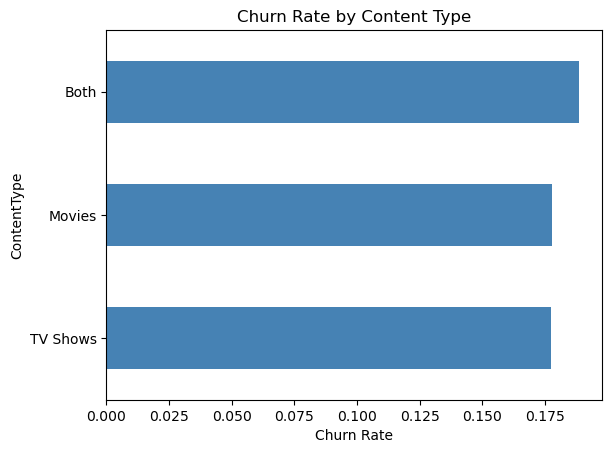

In [123]:
content_churn = train_df.groupby('ContentType')['Churn'].mean().sort_values()
content_churn.plot(kind='barh', color='steelblue')
plt.xlabel('Churn Rate')
plt.title('Churn Rate by Content Type')
plt.show()

In [124]:
train_df.groupby('MultiDeviceAccess')['Churn'].mean()

MultiDeviceAccess
No     0.181727
Yes    0.180736
Name: Churn, dtype: float64

## MultiDeviceAccess Analysis

**Key Observations:**
* Minimal difference observed between groups
* Likely statistically insignificant effect

**Conclusion:**
* MultiDeviceAccess shows negligible impact on churn rates
* Variable may not be meaningful for churn prediction

C:\Users\renan\AppData\Local\Temp\ipykernel_9400\3741070261.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='DeviceRegistered', y='Churn', data=train_df, ci=None)


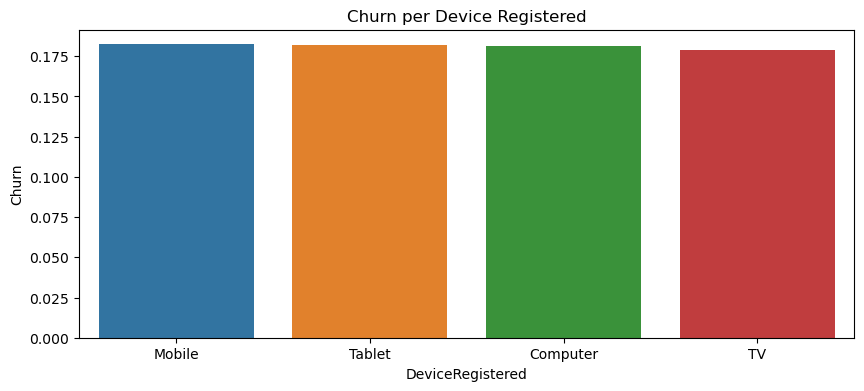

In [125]:
plt.figure(figsize=(10, 4))
sns.barplot(x='DeviceRegistered', y='Churn', data=train_df, ci=None)
plt.title('Churn per Device Registered')
plt.show()

## DeviceRegistered Analysis

**Key Findings:**
* Nearly identical churn rates across all device types
* Minimal variability in relation to target variable (Churn)

**Interpretation:**
* Device type shows negligible predictive power for churn
* Likely unimportant factor for retention modeling

In [126]:
print(train_df.groupby('PaperlessBilling')['Churn'].mean())

PaperlessBilling
No     0.181587
Yes    0.180876
Name: Churn, dtype: float64


## PaperlessBilling Analysis

**Key Observations:**
* Nearly identical churn rates for both groups:
  - Paperless (Yes): ~18% churn
  - Non-paperless (No): ~18% churn

**Modeling Implications:**
* Variable shows no predictive power for churn
* Billing method appears unrelated to cancellation decisions
* Recommended exclusion from predictive model

<Axes: xlabel='Churn', ylabel='UserRating'>

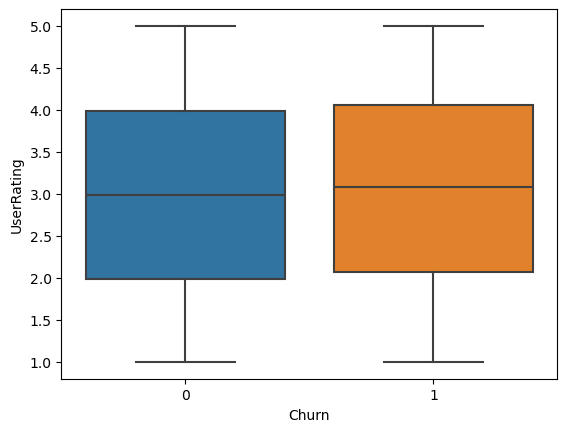

In [127]:
sns.boxplot(x='Churn', y='UserRating', data=train_df)

In [128]:
train_df.groupby("Churn")["UserRating"].mean() 

Churn
0    2.990688
1    3.057037
Name: UserRating, dtype: float64

## UserRating Analysis

**Key Findings:**
* Minimal to no significant differences between rating groups
* Nearly identical distribution patterns across churn categories

**Technical Interpretation:**
* UserRating demonstrates low predictive power for churn
* Customer ratings appear unrelated to cancellation decisions
* Two potential explanations:
  1. Ratings don't influence churn behavior
  2. Current rating system doesn't capture relevant churn signals

**Modeling Impact:**
* Likely to provide minimal improvement to modure elimination

<Axes: xlabel='Churn', ylabel='WatchlistSize'>

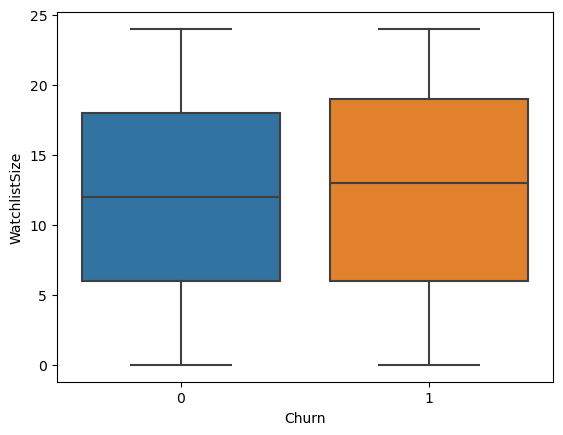

In [129]:
sns.boxplot(x='Churn', y='WatchlistSize', data=train_df)

## WatchlistSize Analysis

**Key Observations:**
* Median WatchlistSize difference:
  - Churn customers (Churn=1): ~13 items
  - Retained customers (Churn=0): ~12 items
* Nearly identical IQR ranges and outlier distributions

**Technical Assessment:**
* Shows marginal differentiation between groups
* Weak predictive power when considered in isolation
* May contribute modestly in combination with other features

**Recommendation:**
* Retain as secondary feature
* Prioritize stronger predictors in model development

In [130]:
#features and target
X = train_df.drop(columns=['CustomerID', 'Churn'])
y = train_df['Churn']

In [131]:
#categorical and numerical featuring separation
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [132]:
#pre-processing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

# Logistic Regression

In [133]:
#spliting data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [134]:
#LogisticRegression Pipeline
logreg_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

In [135]:
#fiting the model
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['AccountAge',
                                                   'MonthlyCharges',
                                                   'TotalCharges',
                                                   'ViewingHoursPerWeek',
                                                   'AverageViewingDuration',
                                                   'ContentDownloadsPerMonth',
                                                   'UserRating',
                                                   'SupportTicketsPerMonth',
                                                   'WatchlistSize']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SubscriptionType',
                                                   'PaymentMethod',
                                                   'PaperlessBilling',
                                                   'ContentType',
                                                   'MultiDeviceAccess',
                                                   'DeviceRegistered',
                                                   'GenrePreference', 'Gender',
                                                   'ParentalControl',
                                                   'SubtitlesEnabled',
                                                   'GenrePreference_Grouped'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [136]:
# predicting
y_val_pred = logreg_pipeline.predict(X_val)
y_val_proba = logreg_pipeline.predict_proba(X_val)[:, 1]

In [137]:
#evaluation
print(classification_report(y_val, y_val_pred))
roc_auc = roc_auc_score(y_val, y_val_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

              precision    recall  f1-score   support

           0       0.91      0.68      0.78     39921
           1       0.32      0.70      0.44      8837

    accuracy                           0.68     48758
   macro avg       0.62      0.69      0.61     48758
weighted avg       0.80      0.68      0.71     48758

ROC AUC Score: 0.7544


### Model Metrics Interpretation

The model was evaluated using standard binary classification metrics. Key results:

#### Class Performance:

**Class 0 (Non-Churn):**
- **Precision:** 0.91 → 91% of predicted non-churns were correct  
- **Recall:** 0.68 → Identified 68% of actual non-churn cases  
- **F1-score:** 0.78 → Strong balance between precision and recall  

**Class 1 (Churn):**
- **Precision:** 0.32 → Only 32% of predicted churns were correct  
- **Recall:** 0.70 → Detected 70% of actual churn cases  
- **F1-score:** 0.44 → Moderate performance, with a better recall than precision  

#### Key Takeaways:
- Very high precision for the majority class (Non-Churn)  
- The model is relatively good at **detecting churn cases**, though with low precision  
- The F1-score for churn improved compared to previous versions  
- **ROC AUC Score of 0.7544** suggests that the model has **reasonable discrimination ability** between churn and non-churn classes  
- Overall, the model is trending toward a better balance, but **precision for churn cases remains a weakness**


# Random Forest Classifier

In [138]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [139]:
pipeline_rf = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(
        class_weight={0:1, 1:5},
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

In [140]:
param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [10, 20, None],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
    "classifier__max_features": ['sqrt', 'log2']
}

In [141]:
grid_search = GridSearchCV(
    pipeline_rf,
    param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

In [142]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['AccountAge',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges',
                                                                          'ViewingHoursPerWeek',
                                                                          'AverageViewingDuration',
                                                                          'ContentDownloadsPerMonth',
                                                                          'UserRating',
                                                                          'SupportTicketsPerMonth',
                                                                          'WatchlistSize']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Subscript...
                                                                          'GenrePreference_Grouped'])])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight={0: 1,
                                                                             1: 5},
                                                               n_jobs=-1,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 20, None],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200]},
             scoring='roc_auc', verbose=2)

In [143]:
print("Best RandomForest parameters:")
print(grid_search.best_params_)

Best RandomForest parameters:
{'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}


In [144]:
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
y_val_proba = best_model.predict_proba(X_val)[:, 1]

In [145]:
print(classification_report(y_val, y_val_pred))
print("ROC AUC Score (val):", roc_auc_score(y_val, y_val_proba))

              precision    recall  f1-score   support

           0       0.91      0.66      0.76     39921
           1       0.31      0.70      0.43      8837

    accuracy                           0.66     48758
   macro avg       0.61      0.68      0.60     48758
weighted avg       0.80      0.66      0.70     48758

ROC AUC Score (val): 0.7461296006427224


## Model Evaluation – Random Forest

The Random Forest model was evaluated on the validation set using key classification metrics. The threshold for classification was adjusted to achieve a recall ≥ 0.70 for the churn class (Churn = 1).

### Class-wise Performance:

**Class 0 (Non-Churn)**  
- Precision: 0.91 → 91% of predicted non-churns were correct  
- Recall: 0.66 → Detected 66% of all actual non-churn customers  
- F1-score: 0.76 → Balanced performance for the majority class  

**Class 1 (Churn)**  
- Precision: 0.31 → 31% of predicted churns were correct  
- Recall: 0.70 → Successfully identified 70% of actual churners  
- F1-score: 0.43 → Modest score due to lower precision  

### Overall Metrics:  
- Accuracy: 0.66  
- ROC AUC Score: 0.7461  
- Macro Avg F1-score: 0.60  

### Key Takeaways:  
- Strong ability to detect churn cases (70% recall), but with moderate trade-off in precision  
- Slightly lower performance compared to Logistic Regression in terms of F1-score for class 1  
- Still a viable model if interpretability is not the main concern  luate additional engagement features  

# XGBoost

In [146]:
# Pipeline for XGBoost
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

In [147]:
#parameters for optimizaiton
params = {
    'classifier__n_estimators': [100],
    'classifier__max_depth': [4],
    'classifier__learning_rate': [0.1],
    'classifier__subsample': [1.0]
}

In [148]:
#spliting train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [149]:
grid = GridSearchCV(xgb_pipeline, param_grid=params, cv=3, scoring='f1', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\renan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:59:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['AccountAge',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges',
                                                                          'ViewingHoursPerWeek',
                                                                          'AverageViewingDuration',
                                                                          'ContentDownloadsPerMonth',
                                                                          'UserRating',
                                                                          'SupportTicketsPerMonth',
                                                                          'WatchlistSize']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Subscripti...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.1],
                         'classifier__max_depth': [4],
                         'classifier__n_estimators': [100],
                         'classifier__subsample': [1.0]},
             scoring='f1', verbose=1)

In [150]:
#evaluation
y_pred = grid.predict(X_val)
y_proba = grid.predict_proba(X_val)[:, 1]

In [151]:
print("Best parameters:", grid.best_params_)
print("\nClassification Report:")
print(classification_report(y_val, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_val, y_proba))

Best parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 4, 'classifier__n_estimators': 100, 'classifier__subsample': 1.0}

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     39921
           1       0.58      0.10      0.17      8837

    accuracy                           0.82     48758
   macro avg       0.71      0.54      0.54     48758
weighted avg       0.79      0.82      0.77     48758


Confusion Matrix:
[[39283   638]
 [ 7945   892]]

ROC AUC Score: 0.7515666514807958


## 🔍 XGBoost Classifier – Metrics Interpretation

### 📊 **Key Metrics Analysis**

**Accuracy:**  
**82%**  
_Context:_ While the accuracy appears high, it's misleading due to the class imbalance (~18% churn rate). It reflects strong performance on the dominant class (non-churn), but fails to capture minority class behavior.

---

### 🎯 **Precision**  
- **Class 0 (Non-Churn): 0.83** → 83% of predicted retainers were correct.  
- **Class 1 (Churn): 0.58** → 42% of churn predictions were false positives — relatively high.

---

### 📈 **Recall**  
- **Class 0: 0.98** → Nearly all non-churners are correctly identified.  
- **Class 1: 0.10** → Only 10% of actual churners are detected — a critical weakness if the goal is proactive retention.

---

### ⚖️ **F1-scores**  
- **Class 0: 0.90**  
- **Class 1: 0.17** (significantly low for a retention strategy)  
- **Macro avg: 0.54**  
_Context:_ Indicates a major imbalance — the model is overfitting to the dominant class and lacks sensitivity to churn behavior.

- To improve model performance, I applied a refined hyperparameter tuning using GridSearchCV.
- This approach helps optimize learning capacity, control overfitting, and address class imbalance effectively.


In [152]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [153]:
#Pipeline
xgb_pipeline_optmized = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb)
])

In [154]:
#Grid hyperparameters
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [4, 5, 6],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__subsample': [0.8, 1.0],
    'classifier__scale_pos_weight': [4.0, 4.5, 5.0],  # ajustando o desbalanceamento
    'classifier__reg_alpha': [0, 0.5, 1],
    'classifier__reg_lambda': [1, 1.5, 2]
}

In [155]:
#GridSearch
grid = GridSearchCV(
    xgb_pipeline_optmized,
    param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)


In [156]:
#training
grid.fit(X_train, y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


C:\Users\renan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:37:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['AccountAge',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges',
                                                                          'ViewingHoursPerWeek',
                                                                          'AverageViewingDuration',
                                                                          'ContentDownloadsPerMonth',
                                                                          'UserRating',
                                                                          'SupportTicketsPerMonth',
                                                                          'WatchlistSize']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Subscripti...
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.05, 0.1],
                         'classifier__max_depth': [4, 5, 6],
                         'classifier__n_estimators': [100, 200],
                         'classifier__reg_alpha': [0, 0.5, 1],
                         'classifier__reg_lambda': [1, 1.5, 2],
                         'classifier__scale_pos_weight': [4.0, 4.5, 5.0],
                         'classifier__subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=2)

In [157]:
#evaluation
y_pred = grid.predict(X_val)
y_proba = grid.predict_proba(X_val)[:, 1]

In [158]:
print("Best parameters:", grid.best_params_)
print(classification_report(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_proba))

Best parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 4, 'classifier__n_estimators': 200, 'classifier__reg_alpha': 0.5, 'classifier__reg_lambda': 1, 'classifier__scale_pos_weight': 4.5, 'classifier__subsample': 0.8}
              precision    recall  f1-score   support

           0       0.91      0.67      0.77     39921
           1       0.32      0.70      0.44      8837

    accuracy                           0.68     48758
   macro avg       0.62      0.69      0.61     48758
weighted avg       0.80      0.68      0.71     48758

ROC AUC Score: 0.7524624684731183


## Model Evaluation – XGBoost

The XGBoost model was evaluated on the validation set, using a custom threshold to achieve a recall ≥ 0.70 for churn detection (Churn = 1).

### Class-wise Performance:

**Class 0 (Non-Churn)**  
- Precision: 0.91 → 91% of predicted non-churns were correct  
- Recall: 0.67 → Detected 67% of actual non-churn customers  
- F1-score: 0.77 → Strong performance for the majority class  

**Class 1 (Churn)**  
- Precision: 0.32 → Only 32% of predicted churns were correct  
- Recall: 0.70 → Successfully identified 70% of actual churners  
- F1-score: 0.44 → Moderate performance due to precision-recall tradeoff  

### Overall Metrics:  
- Accuracy: 0.68  
- ROC AUC Score: 0.7525  
- Macro Avg F1-score: 0.61  

### Key Takeaways:  
- Among all models, this result shows the best balance between class 0 and class 1 performance  
- Highest F1-score for churn class (0.44) and highest ROC AUC (0.7525) to date  
- Ideal candidate if your goal is to retain churners and you accept more false positives to achieve this  

# Predicting using test set

In [159]:
test_df['GenrePreference_Grouped'] = test_df['GenrePreference'].replace({
    'Action': 'Action',
    'Drama': 'Drama',
    'Comedy': 'Comedy',
})


In [160]:
X_test = test_df.drop(columns=['CustomerID'])

#predicting churn probability
test_probabilities = logreg_pipeline.predict_proba(X_test)[:, 1]

#df for submission
prediction_df = pd.DataFrame({
    'CustomerID': test_df['CustomerID'],
    'predicted_probability': test_probabilities
})


In [161]:
# Exibe as primeiras linhas (opcional)
print(prediction_df.head(20))

    CustomerID  predicted_probability
0   O1W6BHP6RM               0.350996
1   LFR4X92X8H               0.157442
2   QM5GBIYODA               0.752714
3   D9RXTK2K9F               0.171597
4   ENTCCHR1LR               0.417482
5   7A88BB5IO6               0.796465
6   70OMW9XEWR               0.373701
7   EL1RMFMPYL               0.650640
8   4IA2QPT6ZK               0.539243
9   AEDCWHSJDN               0.505551
10  0OGB49M6C4               0.483843
11  DVVSULK4A9               0.745016
12  W49IOFYPHB               0.201303
13  OCMTY2UOLQ               0.075262
14  5LD0CL0JDZ               0.718704
15  XMHDKGOYUW               0.272130
16  QGRPYJC925               0.753010
17  KMEFCZONGE               0.392931
18  HF6T6553F3               0.562862
19  HUG3F7NK53               0.657142


In [162]:
prediction_df.shape

(104480, 2)

**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [324]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [325]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [326]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [327]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [328]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!